# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\veldu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("example.env")
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy",
    page=1
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

#bitcoin_headlines
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 4063


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Jonathan Shieber',
 'title': 'Casa pivots to provide self-custody services to secure bitcoin',
 'description': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbase. “With self-custody using Casa it’s impossible to be hacke…',
 'url': 'http://techcrunch.com/2020/08/06/casa-pivots-to-provide-self-custody-services-to-secure-bitcoin/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/06/GettyImages-1050523528.jpg?w=600',
 'publishedAt': '2020-08-06T18:25:29Z',
 'content': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy",
    page=1
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

#Ethereum headlines
ethereum_headlines["articles"][0]

Total articles about Ethereum: 1369


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
1,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864
2,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878
3,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937
4,2020-08-07,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.000,0.791
1,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000
2,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.000,0.819
3,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.000,1.000
4,2020-08-19,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.164506,0.081265,0.048510,0.870255
std,0.442478,0.058165,0.065229,0.075665
min,-0.865800,0.000000,0.000000,0.588000
25%,-0.095875,0.029000,0.000000,0.821000
50%,0.271400,0.090000,0.000000,0.881500
75%,0.507000,0.127250,0.085000,0.910000
max,0.790100,0.222000,0.294000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.091364,0.066298,0.045362,0.888330
std,0.439214,0.069708,0.067108,0.084671
min,-0.910000,0.000000,0.000000,0.689000
25%,-0.096325,0.000000,0.000000,0.831500
50%,0.000000,0.065000,0.000000,0.903500
75%,0.447375,0.095000,0.075000,0.942750
max,0.851900,0.311000,0.309000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z ]")
lemmatizer = WordNetLemmatizer()

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    re_clean = regex.sub('', text)

    # Create a list of the words
    words = word_tokenize(re_clean)

    # Convert the words to lowercase
    # Remove the stop words
    output = [word.lower() for word in words if word.lower() not in sw]

    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in output]
        
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_tokenized = []

for index, row in bitcoin_df.iterrows():
    tokens_append = tokenizer(row['text'])
    bitcoin_tokenized.append(tokens_append)

bitcoin_df['tokens'] = bitcoin_tokenized
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851,"[casa, coloradobased, provider, bitcoin, secur..."
1,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864,"[question, still, remained, though, whether, g..."
2,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878,"[ransomware, variant, called, netwalker, surpr..."
3,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937,"[covid, pandemic, resulted, mass, shift, worki..."
4,2020-08-07,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954,"[appears, massive, coordinated, strike, reddit..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_tokenized = []

for index, row in ethereum_df.iterrows():
    tokens_append = tokenizer(row['text'])
    ethereum_tokenized.append(tokens_append)

ethereum_df['tokens'] = ethereum_tokenized
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.000,0.791,"[youve, interacted, cryptocurrencies, past, co..."
1,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000,"[tldr, mega, blockchain, mastery, bundle, sale..."
2,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.000,0.819,"[london, reuters, sound, like, surefire, bet, ..."
3,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.000,1.000,"[new, york, reuters, brooklynbased, technology..."
4,2020-08-19,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881,"[outspoken, bitcoin, whale, rarely, show, affe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
#bitcoin_corpus = [row['text'] for index, row in bitcoin_df.iterrows()]

bitcoin_corpus = bitcoin_df['text'].to_list()

bitcoin_big_string = ' '.join(bitcoin_corpus)

bitcoin_processed = tokenizer(bitcoin_big_string)

bitcoin_bigram_counts = Counter(ngrams(bitcoin_processed, n=2))

print (bitcoin_bigram_counts)


('read', 'end'): 1, ('end', 'article'): 1, ('article', 'char'): 1, ('char', 'addition'): 1, ('addition', 'obstruction'): 1, ('obstruction', 'justice'): 1, ('justice', 'prosecutor'): 1, ('prosecutor', 'charged'): 1, ('charged', 'sullivan'): 1, ('sullivan', 'failing'): 1, ('failing', 'share'): 1, ('share', 'knowledge'): 1, ('knowledge', 'felony'): 1, ('felony', 'total'): 1, ('total', 'face'): 1, ('face', 'eight'): 1, ('eight', 'year'): 1, ('prison', 'convicted'): 1, ('convicted', 'chargeswe'): 1, ('chargeswe', 'exp'): 1, ('exp', 'char'): 1, ('char', 'federal'): 1, ('federal', 'authority'): 1, ('authority', 'homed'): 1, ('homed', 'yearold'): 1, ('yearold', 'massachusetts'): 1, ('massachusetts', 'allegedly'): 1, ('allegedly', 'played'): 1, ('played', 'significant'): 1, ('significant', 'role'): 1, ('role', 'july'): 1, ('july', 'twitter'): 1, ('twitter', 'hackback'): 1, ('hackback', 'july'): 1, ('july', 'authority'): 1, ('authority', 'arrested'): 1, ('arrested', 'yearold'): 1, ('yearold', 'g

In [17]:
# Generate the Ethereum N-grams where N=2
#ethereum_corpus = [row['text'] for index, row in ethereum_df.iterrows()]
ethereum_corpus = ethereum_df['text'].to_list()

ethereum_big_string = ' '.join(ethereum_corpus)

ethereum_processed = tokenizer(ethereum_big_string)

ethereum_bigram_counts = Counter(ngrams(ethereum_processed, n=2))

print (ethereum_bigram_counts)


attack', 'aug'): 1, ('aug', 'ullithe'): 1, ('ullithe', 'char'): 1, ('ethereum', 'delayed'): 1, ('delayed', 'may'): 1, ('may', 'still'): 1, ('still', 'see'): 1, ('see', 'launch'): 1, ('launch', 'eth'): 1, ('eth', 'staking'): 1, ('staking', 'fall'): 1, ('fall', 'time'): 1, ('time', 'investor'): 1, ('investor', 'decide'): 1, ('decide', 'stake'): 1, ('stake', 'ethereum'): 1, ('ethereum', 'promise'): 1, ('promise', 'earnings'): 1, ('earnings', 'char'): 1, ('price', 'ren'): 1, ('ren', 'token'): 1, ('token', 'renvm'): 1, ('renvm', 'defi'): 1, ('defi', 'network'): 1, ('network', 'surged'): 1, ('surged', 'past'): 1, ('week', 'thats'): 1, ('thats', 'total'): 1, ('total', 'amount'): 1, ('amount', 'renbtc'): 1, ('renbtc', 'tokenized'): 1, ('tokenized', 'bitcoin'): 1, ('bitcoin', 'locked'): 1, ('locked', 'renvm'): 1, ('renvm', 'broke'): 1, ('broke', 'char'): 1, ('char', 'investor'): 1, ('investor', 'primarily'): 1, ('primarily', 'treat'): 1, ('treat', 'bitcoin'): 1, ('bitcoin', 'btcusd'): 1, ('btcu

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin

bitcoin_top_10 = dict(token_count(bitcoin_processed, N=10))
pd.DataFrame(list(bitcoin_top_10.items()), columns=['bigram', 'count'])

,bigram,count
0,char,97
1,bitcoin,73
2,satoshi,40
3,nakaboto,40
4,today,23
5,every,21
6,another,21
7,edition,21
8,tell,21
9,going,21


In [20]:
# Get the top 10 words for Ethereum
ethereum_top_10 = dict(token_count(ethereum_processed, N=10))
pd.DataFrame(list(ethereum_top_10.items()), columns=['bigram', 'count'])

,bigram,count
0,char,94
1,ethereum,62
2,bitcoin,25
3,blockchain,18
4,network,18
5,defi,17
6,decentralized,16
7,trading,13
8,finance,13
9,exchange,13


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

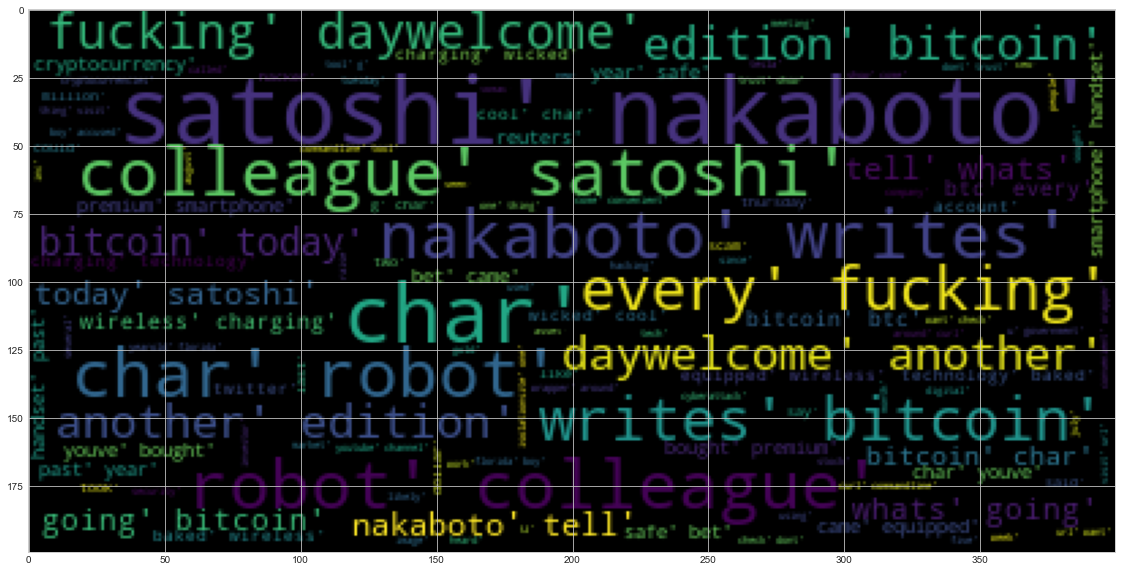

In [22]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(str(bitcoin_processed))
plt.imshow(bitcoin_wc)

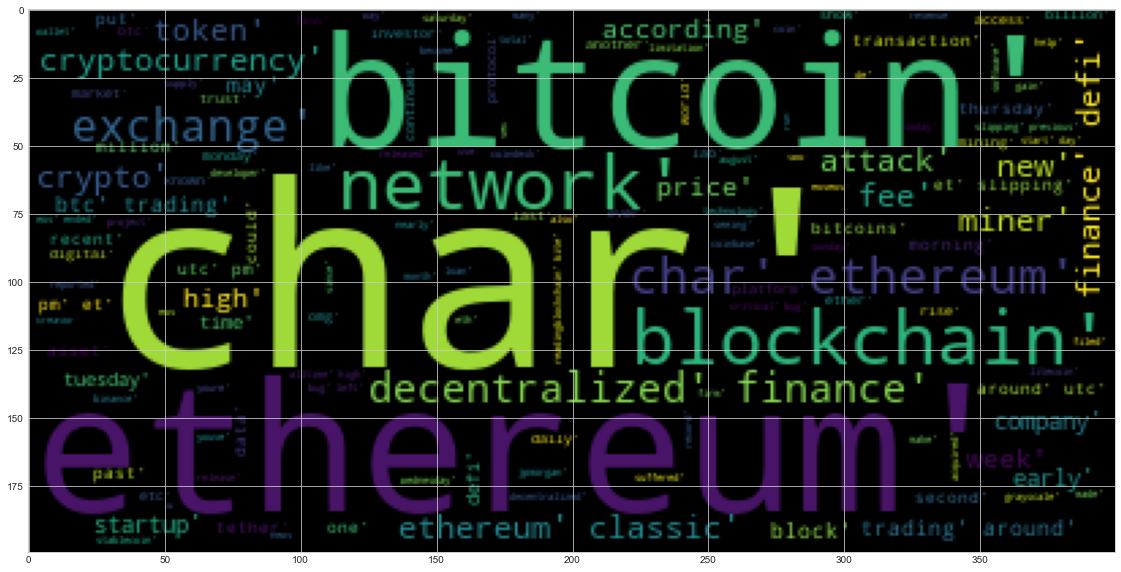

In [23]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(str(ethereum_processed))
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_ner_corpus = bitcoin_df['text'].to_list()

In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(str(bitcoin_ner_corpus))

# Add a title to the document
bitcoin_doc.user_data["title"] = "BITCOIN NER"

In [29]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [31]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Casa PERSON
Colorado GPE
Coinbas ORG
months DATE
Guy PERSON
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
VPN PRODUCT
Reddit ORG
over dozens CARDINAL
Friday DATE
afternoon TIME
pro-Donald Trump PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin BTC FAC
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Wednesday DATE
17-year-old DATE
Florida GPE
Twitter ORG
last month DATE
Satoshi Nakaboto ORG
Bitcoin BTC FAC
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin BTC FAC
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin BTC FAC
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio.\r\nFTX PRODUCT
$150 million MONE

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
ethereum_ner_corpus = ethereum_df['text'].to_list()

In [33]:
# Run the NER processor on all of the text
ethereum_doc = nlp(str(ethereum_ner_corpus))

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"


In [34]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [35]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

the past couple of years DATE
29.81 MONEY
August 17 DATE
97% PERCENT
LONDON GPE
Reuters ORG
about 20% PERCENT
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
REUTERS/Rick Wilking\r\n ORG
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000.\xa0</li><li MONEY
The Galaxy Digital ORG
Fed ORG
Satoshi Nakaboto ORG
Bitcoin BTC FAC
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
first ORDINAL
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
Ethereum ORG
Mateusz Slodkowski/ PERSON
Imag PERSON
Bitcoin GPE
Images/LightRocket ORG
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
Last week DATE
YouTube PRODUCT
Bitcoin GPE
back.\xa0\r\nThe GPE
Bitcoin GPE
one-week DATE
Bitcoin GPE
BTC ORG
around $11,595 MONEY
20:0 CARDINAL
Rally PERSON
Creator Coin PERSON
Creator Coin PERSON
Monday DATE
500 CARDINAL
less than 1% PERCENT
3 p.m. TIME
Bitcoin GPE
Tuesday DATE

---